<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**비지도 학습** : 타킷이 없을 때 사용하는 머신러닝 알고리즘
> 타깃값이 없을 때 **데이터에 패턴**을 찾거나 **데이터 구조**를 파악하는 머신러닝 방식

# 군집(clustering)
- 비슷한 샘플끼리 그룹으로 모으는 작업
> 클러스터(cluster) : 군집 알고리즘에서 만든 그룹

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-02-04 07:08:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-04 07:08:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-04 07:08:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

"!" 문자로 시작하면 코랩은 이후 명령을 파이썬 코드가 아니라 리눅스 셸(shell) 명령으로 이해한다.  
wget 명령은 원격 주소에서 데이터를 다운로드하여 저장한다.  
\-O 옵션에서 저장할 파일 이름을 지정할 수 있다.

npy : 넘파이 배열의 기본 저장 포맷

In [3]:
# 저장한 파일 불러오기
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy') # 넘파이에서 npy 파일을 로드하는 방법
print("fruits.shape ==", fruits.shape) # 3차원 배열
print("샘플의 수 :", fruits.shape[0])
print("이미지 높이 :", fruits.shape[1])
print("이미지 너비 :", fruits.shape[2])

fruits.shape == (300, 100, 100)
샘플의 수 : 300
이미지 높이 : 100
이미지 너비 : 100


이미지 크기 : 100 * 100  
각 픽셀은 넘파이 배열의 원소 하나에 대응한다.

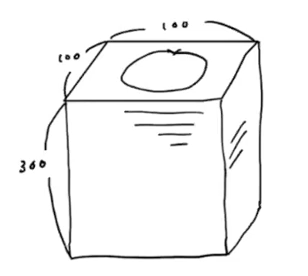

In [4]:
# 첫번째 샘플의 첫 번째 행을 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


이 넘파이 배열은 흑백 사진이므로 0\~255까지의 정숫값을 가진다.

matplotlib의 imshow() 함수를 사용하면 넘파이 배열을 이미지로 그릴 수 있다.  
흑백 이미지이므로 cmap(color map) 매개변수를 'gray'로 지정한다.

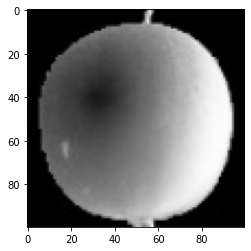

In [7]:
# 첫번째 샘플 출력
plt.imshow(fruits[0], cmap='gray')
plt.show()

위 출력에서 알 수 있듯이 0에 가까울수록 어둡고, 255에 가까울수록 밝다.

보통 흑백 샘플의 이미지는 바탕이 밝고 물체가 짙은 색이다.  
그런데 왜 이 샘플은 반대일까?  
- 이 샘플은 넘파이 배열로 변환할때 반전시킨 것이다.  

왜 반전시킬까?
- 흰색 바탕은 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것이다. 
    - 왜냐하면 알고리즘은 어떤 출력을 만들기 위해 곱셉, 덧셈을 하는데, 픽셀값이 0이면 출력도 0이기 때문에 의미가 없다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다!
- 따라서 바탕을 검게 만들고 물체를 밝게 만든다.


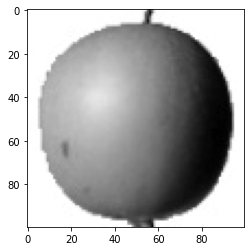

In [8]:
# 흑백을 반전하여 다시 출력
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

300개의 샘플중 사과, 바나나, 파인애플이 각각 100개씩 들어 있다.

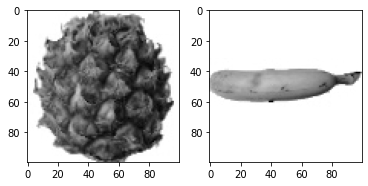

In [9]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap="gray_r")
axs[1].imshow(fruits[200], cmap="gray_r")
plt.show()

matplotlib의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 해준다.  
subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다.

# 픽셀값 분석하기 
- 사용하기 쉽게 fruits 배열을 사과, 파인애플, 바나나로 나눈다.
- 그리고 각 샘플을 2차원이 아닌 1차원 배열로 만든다.
    - 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산하기 쉽다.
- 실전에서는 어떤 샘플이 몇 개가 입력될지 알 수 없다. 예를 위해서 만든 데이터임을 명심!

In [10]:
apple = fruits[:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


### apple, pineapple, banana 배열에 들어 있는 샘플의 픽셀 평균값을 계산하기
- 샘플마다 픽셀의 평균값을 계산해야 하므로 mean() 메서드의 축을 axis=1으로 지정

axis는 배열의 축을 의미한다.

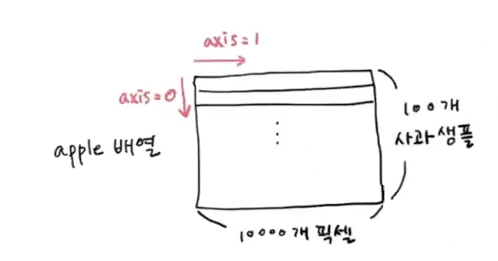

In [11]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


히스토그램을 그려보면 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있다.  
히스토그램이란?
- 값이 발생한 빈도를 그래프로 표시한 것
- 보통 x축이 값의 구간(계급)이고, y축은 발생 빈도(도수)이다.

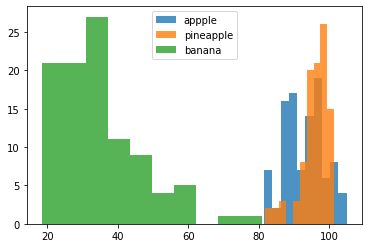

In [12]:
plt.hist(np.mean(apple, axis=1), alpha=0.8) # alpha는 투명도를 주는 역할
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['appple', 'pineapple', 'banana']) # legend 메서드를 사용하면 범례를 표시함
plt.show()

바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작다.  
반면 사과와 파인애플은 많이 겹쳐있어서 픽셀값만으로는 구분하기 쉽지 않다.  
사과나 파인애플은 형태가 비ㅣ슷하고 사진에서 차지하는 크기도 비슷하기 때문.

### 샘플의 평균값이 아니라 픽셀별 평균값으로 비교하기
- 전체 샘플에 대해 각 픽셀의 평균을 계산한다.  
- axis=0으로 두면 픽셀의 평균값 ㅆㄱㄴ

matplotlib의 bar() 함수를 사용해 픽셀 10000개에 대한 평균값을 막대그래프로 그릴 수 있다.

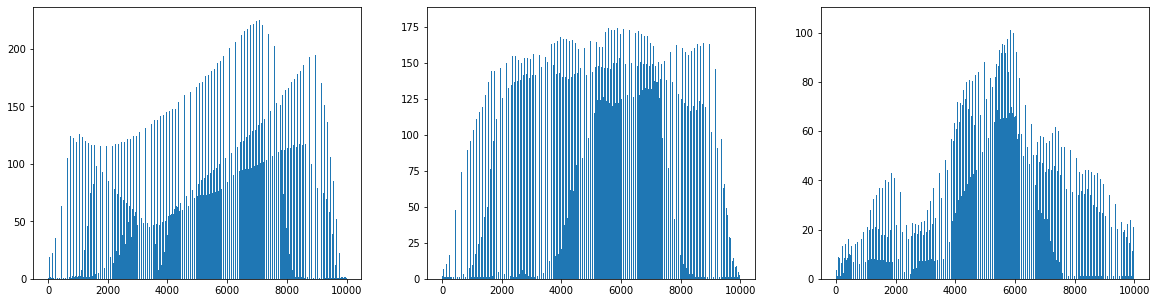

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

사과는 사진이 아래쪽으로 갈수록 값이 높아지고, 파인애플은 그래프가 비교적 고르면서 높음.  
바나나는 확실히 중앙의 픽셀값이 높다.

픽셀의 평균값을 100 * 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋다!  
픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

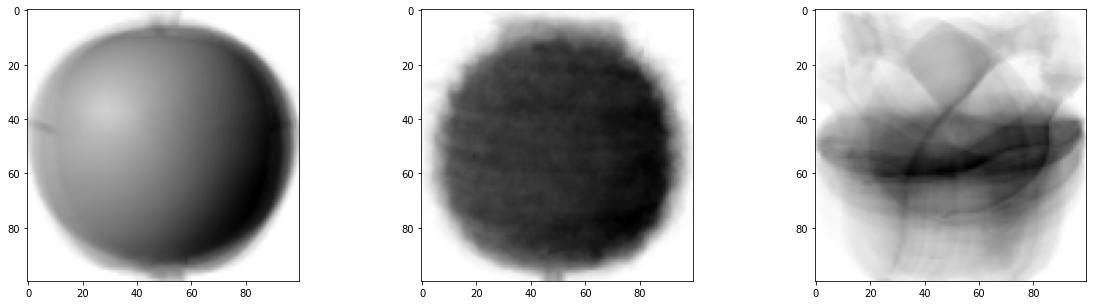

In [14]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].imshow(apple_mean, cmap="gray_r")
axs[1].imshow(pineapple_mean, cmap="gray_r")
axs[2].imshow(banana_mean, cmap="gray_r")
plt.show()

세 과일은 픽셀 위치에 따라 값의 크기가 차이 난다.  
따라서 이 대표 이미지와 가까운 사진을 골라 낸다면 사과, 파인애플, 바나나를 구분할 수 있지 않을까?

절댓값 오차를 사용하여 확인해보자.  
fruits 배열에 모든 샘플에 apple_mean을 뺀 절댓값을 평균한다는 말이다.

In [16]:
abs_diff = np.abs(fruits - apple_mean)
# abs_diff는 (300, 100, 100) 크기이므로 각 샘플에 대한 평균을 구하기 위해 axis=(1,2)
abs_mean = np.mean(abs_diff, axis=(1,2)) 
print(abs_mean.shape)

(300,)


그다음 이 값이 가장 작은 순서대로 100개를 고르면, 오차가 가장 작은 샘플 100개를 고르게 된다.  
np.argsort() 함수는 오름차순으로 나열한 abs_mean 배열의 인덱스를 반환함.

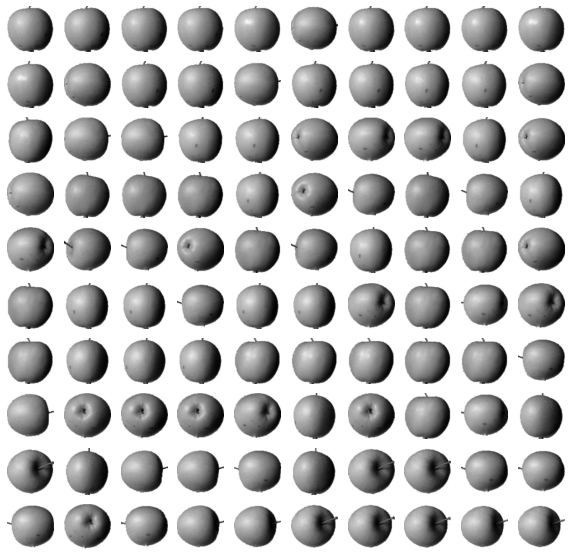

In [18]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap="gray_r")
        axs[i, j].axis('off') # 좌표축을 그리지 않음.
plt.show()

# 중요한 점
샘플에 이미 사과, 파인애플, 바나나가 있다는 알고 있었다.  
즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었던 것이다.   
> 실제 비지도 학습은 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다.

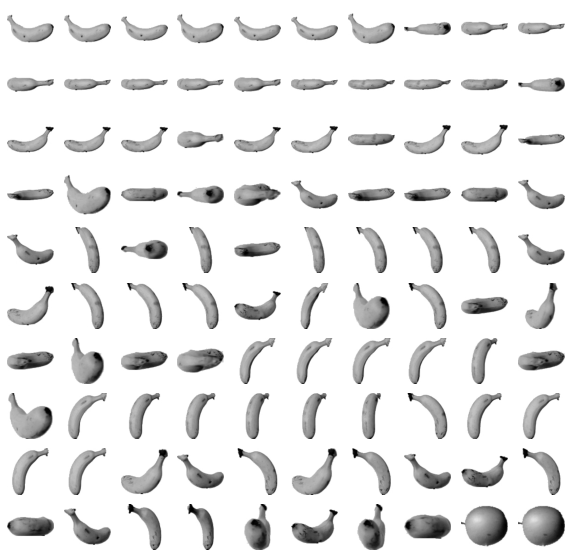

In [19]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2)) 

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap="gray_r")
        axs[i, j].axis('off') 
plt.show()